## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [6]:
import pandas as pd
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('data/human_body_temperature.csv')

In [28]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [76]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1. Is the distribution normal?

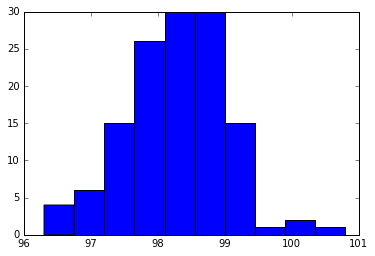

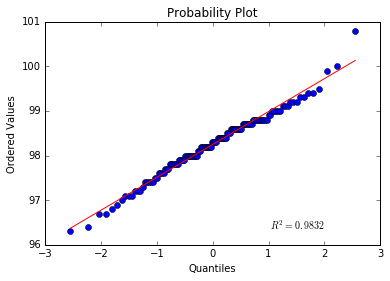

In [27]:
temps = df['temperature']
plt.hist(df['temperature'])
ax = plt.axvline(temps.mean())
plt.show()

import scipy.stats as stats
stats.probplot(temps, dist="norm", plot=plt)
plt.show()

We see from the histogram and the probability plot that the data is approximately normally distributed. R^2 is very close to 1, which indicates a good fit for a normal distribution.

## 2a. Is the true population mean really 98.6 F? Sample Hypothesis Test

Is the true population mean really 98.6 F?

The number of observations is greater than 30, but we don't actually know the population's standard deviation (we know the standard deviation of our sample, though). A t-test seems most appropriate here:


In [33]:
import scipy.stats as stats
stats.ttest_1samp(temps, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [60]:
def compute_t_statistic(sample, mean):
    return (sample.mean() - mean) / (sample.std() / np.sqrt(len(sample)))

tstat = compute_t_statistic(temps, 98.6)
print(tstat)

-5.45482329236


We can also use scipt.stats to calculate the t-statistic and the asspociated p-value:

In [52]:
import scipy.stats as stats
stats.ttest_1samp(temps, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Our t-statistic is -5.45. 

The rejection region is defined by the t-critical value, which can be found as follows:

In [54]:
dof = len(temps) - 1
tcrit = stats.t.isf(0.025, dof)
tcrit

1.9785244914586055

The rejection region is defined as [-tcrit, tcrit]. The t-statistic falls outside this region, so we reject the null hypothesis:

In [63]:
def reject(crit, stat):
    return (stat < 0 - crit or stat > crit)

In [64]:
reject(tcrit, tstat)

True

At 0.05 confidence level, we reject the null hypothesis. There is enough evidence to suggest that 98.6 is not the true mean temperature. There is a very small chance (2.41e-07) that the observed difference between means (population and sample means) is due to randomness in our sample.

## 2b. Which test to use? (z-test vs. t-test)

For large values of n, the t-test gives similar results to the z-test. 


In [67]:
# We assume that the sample standard deviation is the same as the population std.
def zstat(value, sample):
    return(sample.mean() - value) / (sample.std() / np.sqrt(len(sample)))

In [68]:
zstat(98.6, temps)

-5.4548232923640789

We see this exceeds the zscore -1.96 that defines the rejection region on the left side of the mean (for alpha=0.05), so we can reject the null hypothesis. (Note: I'm not sure where to get the zscore using scipy as we did above with the t-critical value) The z-statistic and t-statistic are almost identical, and so are the critical values, so it makes little difference which method we use, given the large sample size. 

## 3. What is an abnormal temperature?

We use the standard error of the sample mean to define a confidence interval:

In [86]:
stderr = stats.sem(temps)
confidence_interval = [temps.mean() - stderr, temps.mean() + stderr]
confidence_interval

[98.184926352392893, 98.313535186068663]

According to our confidence interval, 95% of the time, a "normal" temperature will fall in the range defined 98.184 to 98.313. Anything outside this range would be considered "abnormal".

## 4. Is there a significant difference between the temperatures of males and females?


In [78]:
males = df[df['gender'] == 'M']
females = df[df['gender'] == 'F']

In [80]:
len(males)

65

In [81]:
len(females)

65

In [89]:
stats.ttest_ind(males['temperature'], females['temperature'], equal_var=False)

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)

The p-value is small (2%), so we can reject the null hypothesist that there is no difference in mean temperature between males and females.